PROBLEM:

Project Statement:

AAL is a household name in Australia, known for its clothing business since 2000. It caters to all groups— kids, women, men, and seniors. It has opened branches in many states in Australia, in metropolises and tier-1 and tier-2 cities.

The business is booming, and the company is in an expansion mode. It wants to get an in-depth understanding of its sales so that it can make investment decisions. The CEO has tasked the Head of Sales and Marketing (S&M) of AAL to:

Determine the states that are generating the highest revenues and
Formulate sales programs for states with lower revenues. The Head of S&M has approached you for the same.

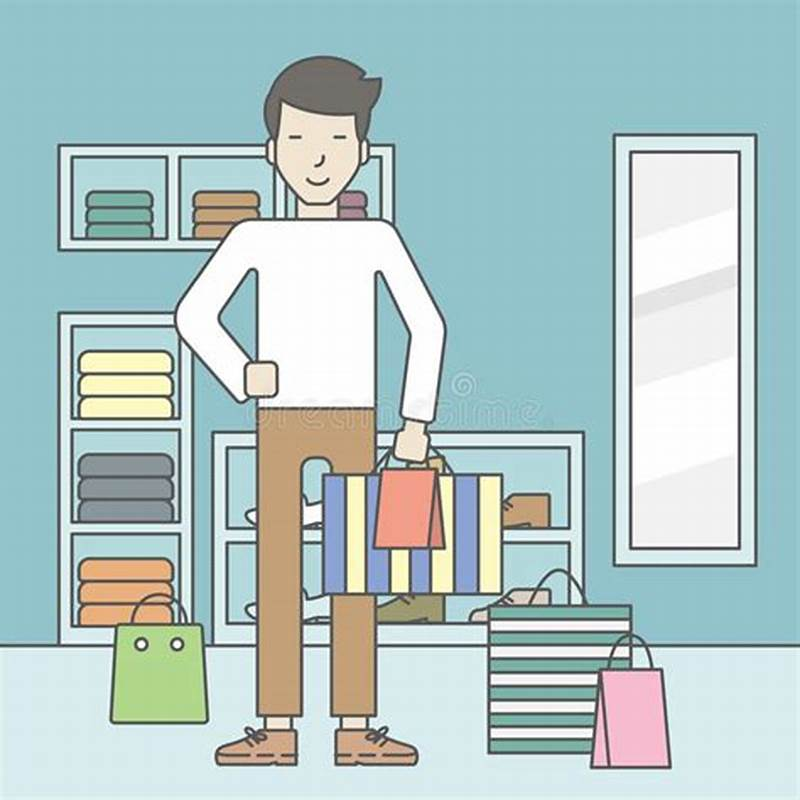

## Step 0: Import libraries

- Install pycountry package to check the countries in th Country column

In [99]:
pip install pycountry

Note: you may need to restart the kernel to use updated packages.


In [155]:
import pandas as pd
import numpy as np
import pycountry
import datetime
import seaborn as sns
from datetime import datetime

## Step 1: Import Data

- **parse_dates = True** reads the date field in the correct format since, currently, the data type of the date column is **object**

In [116]:
df = pd.read_csv('marketing_data.csv',parse_dates = True)

In [117]:
df.memory_usage(deep=True)

Index                     128
ID                      17920
Year_Birth              17920
Education              144522
Marital_Status         143524
 Income                151440
Kidhome                 17920
Teenhome                17920
Dt_Customer            143283
Recency                 17920
MntWines                17920
MntFruits               17920
MntMeatProducts         17920
MntFishProducts         17920
MntSweetProducts        17920
MntGoldProds            17920
NumDealsPurchases       17920
NumWebPurchases         17920
NumCatalogPurchases     17920
NumStorePurchases       17920
NumWebVisitsMonth       17920
AcceptedCmp3            17920
AcceptedCmp4            17920
AcceptedCmp5            17920
AcceptedCmp1            17920
AcceptedCmp2            17920
Response                17920
Complain                17920
Country                132588
dtype: int64

## Step 2: Data Cleaning + Preprocessing

--> Data in general:

1. Duplicated

In [118]:
df['ID'].is_unique

True

2. Invalid entries

In [120]:
df['Marital_Status'] = df['Marital_Status'].replace(['YOLO', 'Alone', 'Absurd'], 'Single')

df['Education'] = df['Education'].replace('Graduation', 'Bachelor')

df['Education'] = df['Education'].replace(['2nd Cycle','2n Cycle'], 'Master')

def is_valid_country_initials(initials):
    try:
        pycountry.countries.get(alpha_2=initials)
        return True
    except pycountry.exceptions.CountryNotFoundError:
        return False

all(is_valid_country_initials(initial) for initial in df['Country'])

True

3. Rename Cols & formatting
    - Remove white spaces from the Income column

In [121]:
df.dtypes

ID                      int64
Year_Birth              int64
Education              object
Marital_Status         object
 Income                object
Kidhome                 int64
Teenhome                int64
Dt_Customer            object
Recency                 int64
MntWines                int64
MntFruits               int64
MntMeatProducts         int64
MntFishProducts         int64
MntSweetProducts        int64
MntGoldProds            int64
NumDealsPurchases       int64
NumWebPurchases         int64
NumCatalogPurchases     int64
NumStorePurchases       int64
NumWebVisitsMonth       int64
AcceptedCmp3            int64
AcceptedCmp4            int64
AcceptedCmp5            int64
AcceptedCmp1            int64
AcceptedCmp2            int64
Response                int64
Complain                int64
Country                object
dtype: object

In [122]:
df.rename(columns={' Income ':'Income'},inplace=True)

df['Year_Birth'] = df['Year_Birth'].astype('int32')

df['Education'] = df['Education'].astype('string')
df['Marital_Status'] = df['Marital_Status'].astype('string')

df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])
df['Country'] = df['Country'].astype('string')

df['Kidhome'] = df['Kidhome'].astype('int8')
df['Teenhome'] = df['Teenhome'].astype('int8')


df['Income'] = df['Income'].str.replace('[$,]', '', regex=True).astype(float)

4. Data Type check

In [123]:
df.dtypes

ID                              int64
Year_Birth                      int32
Education                      string
Marital_Status                 string
Income                        float64
Kidhome                          int8
Teenhome                         int8
Dt_Customer            datetime64[ns]
Recency                         int64
MntWines                        int64
MntFruits                       int64
MntMeatProducts                 int64
MntFishProducts                 int64
MntSweetProducts                int64
MntGoldProds                    int64
NumDealsPurchases               int64
NumWebPurchases                 int64
NumCatalogPurchases             int64
NumStorePurchases               int64
NumWebVisitsMonth               int64
AcceptedCmp3                    int64
AcceptedCmp4                    int64
AcceptedCmp5                    int64
AcceptedCmp1                    int64
AcceptedCmp2                    int64
Response                        int64
Complain    

--> Categorical 

2. Missing 

In [ ]:
df['Income'] = df.groupby(['Education','Marital_Status'])['Income'].transform(lambda x: x.fillna(x.mean()))

df.isnull().sum()

1. Encoding
    - one hot encoding for the Marital_Status and Country columns 
    - Ordinal encoding for Education column

In [124]:
df = pd.get_dummies(df, columns=['Marital_Status'], prefix=['Marital'])
df = pd.get_dummies(df, columns=['Country'], prefix=['Country'])

# Define the ordinal mapping
education_mapping = {
    'Basic': 1,
    'Bachelor': 2,
    'Master': 3,
    'PhD': 4
}
    
# Apply the mapping to the dataframe
df['Education'] = df['Education'].map(education_mapping)
#print(df)

--> Numeric:

1. Missing

In [46]:
df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Response               0
Complain               0
Marital_Divorced       0
Marital_Married        0
Marital_Single         0
Marital_Together       0
Marital_Widow          0
Country_AUS            0
Country_CA             0
Country_GER            0
Country_IND            0
Country_ME             0
Country_SA             0
Country_SP             0
Country_US             0
dtype: int64

2. Local values 

In [87]:
selected_cols = df.iloc[:, list(range(0, 6)) + list(range(7, 26))]

mins = selected_cols.apply(lambda col: col.min())
maxs = selected_cols.apply(lambda col: col.max())

for col,min_val, max_val in zip(selected_cols, mins, maxs):
    print(col, ': min = ', min_val, ', max = ', max_val)

ID : min =  0.0 , max =  11191.0
Year_Birth : min =  1893.0 , max =  1996.0
Education : min =  1.0 , max =  4.0
Income : min =  1730.0 , max =  666666.0
Kidhome : min =  0.0 , max =  2.0
Teenhome : min =  0.0 , max =  2.0
Recency : min =  0.0 , max =  99.0
MntWines : min =  0.0 , max =  1493.0
MntFruits : min =  0.0 , max =  199.0
MntMeatProducts : min =  0.0 , max =  1725.0
MntFishProducts : min =  0.0 , max =  259.0
MntSweetProducts : min =  0.0 , max =  263.0
MntGoldProds : min =  0.0 , max =  362.0
NumDealsPurchases : min =  0.0 , max =  15.0
NumWebPurchases : min =  0.0 , max =  27.0
NumCatalogPurchases : min =  0.0 , max =  28.0
NumStorePurchases : min =  0.0 , max =  13.0
NumWebVisitsMonth : min =  0.0 , max =  20.0
AcceptedCmp3 : min =  0.0 , max =  1.0
AcceptedCmp4 : min =  0.0 , max =  1.0
AcceptedCmp5 : min =  0.0 , max =  1.0
AcceptedCmp1 : min =  0.0 , max =  1.0
AcceptedCmp2 : min =  0.0 , max =  1.0
Response : min =  0.0 , max =  1.0
Complain : min =  0.0 , max =  1.0


3. Normalisation

4. Add Age, Total_Spending, No_Children

In [154]:
current_year = datetime.now().year

df['age'] = current_year - df['Year_Birth']
df['Total_Spending'] = df.iloc[:,8:14].sum(axis=1)
df['No_Children'] = df['Kidhome'] + df['Teenhome']

0       2014
1       2014
2       2014
3       2014
4       2014
        ... 
2235    2013
2236    2013
2237    2012
2238    2012
2239    2012
Name: Dt_Customer, Length: 2240, dtype: int64


In [136]:
df.head()


,ID,Year_Birth,Education,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,Marital_Widow,Country_AUS,Country_CA,Country_GER,Country_IND,Country_ME,Country_SA,Country_SP,Country_US,age
0,1826,1970,2,84835.0,0,0,2014-06-16,0,189,104,...,0,0,0,0,0,0,0,1,0,53
1,1,1961,2,57091.0,0,0,2014-06-15,0,464,5,...,0,0,1,0,0,0,0,0,0,62
2,10476,1958,2,67267.0,0,1,2014-05-13,0,134,11,...,0,0,0,0,0,0,0,0,1,65
3,1386,1967,2,32474.0,1,1,2014-05-11,0,10,0,...,0,1,0,0,0,0,0,0,0,56
4,5371,1989,2,21474.0,1,0,2014-04-08,0,6,16,...,0,0,0,0,0,0,0,1,0,34


## Step 3: EDA

--> Univariate (Independent or target) 

--> Bi-variate (target versus other Variables) 

--> Multivariate (All/several variables together)

<AxesSubplot:>

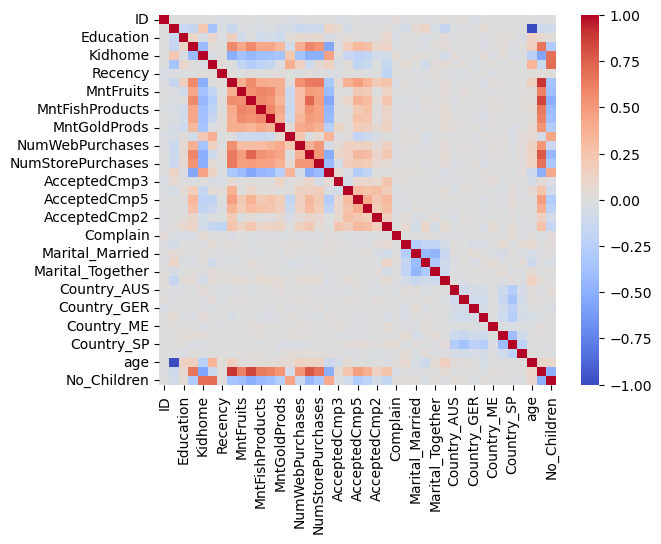

In [213]:
corr = df.corr()
#sns.heatmap(corr,cmap = 'Blues')
#heatmap = sns.heatmap(corr, cmap="coolwarm", vmin=-1, vmax=1)

import matplotlib.colors as mcolors

# Create a custom color palette
custom_palette = [
    mcolors.to_rgb("#000000"),
    mcolors.to_rgb("#222222"),
    mcolors.to_rgb("#444444"),
    mcolors.to_rgb("#666666"),
    mcolors.to_rgb("#888888"),
    mcolors.to_rgb("#AAAAAA"),
    mcolors.to_rgb("#CCCCCC"),
    mcolors.to_rgb("#EEEEEE"),
    mcolors.to_rgb("#FFFFFF"),
]

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = False


# Create a heatmap 
#sns.heatmap(corr,cmap = 'coolwarm', mask = np.tril(corr))
#sns.heatmap(corr,cmap = 'coolwarm')
sns.heatmap(corr, cmap='RdBu_r', mask=mask,cbar=True)


## Step 4: Testing

## Step 5: Analysis